In [ ]:
import os

print('Patient with 5 visit')
print(len(os.listdir('B:/Sami Sir Research/Data set/Final Dataset v2/five_v')))
print('Patient with 4 visit')
print(len(os.listdir('B:/Sami Sir Research/Data set/Final Dataset v2/four_v')))
print('Patient with 3 visit')
print(len(os.listdir('B:/Sami Sir Research/Data set/Final Dataset v2/three_v')))
print('Patient with 2 visit')
print(len(os.listdir('B:/Sami Sir Research/Data set/Final Dataset v2/two_v')))
print('Patient with 1 visit')
print(len(os.listdir('B:/Sami Sir Research/Data set/Final Dataset v2/one_v')))

# Split Dataset

In [2]:
import os
import shutil

def split_dataset_based_on_visit_count(root_dir):
    patient_list = os.listdir(root_dir)
    print(len(patient_list))
    
    # Define base directory for the new folders
    base_dir = r'B:\Sami Sir Research\Data set\Final Dataset v2'

    for patient_id in patient_list:
        patient_dir = os.path.join(root_dir, patient_id)
        
        if os.path.isdir(patient_dir):
            # Inside each patient directory, look for Reconstructed_DaTSCAN directory
            reconstructed_datscan_dir = os.path.join(patient_dir, "Reconstructed_DaTSCAN")
            if os.path.isdir(reconstructed_datscan_dir):
                # Inside Reconstructed_DaTSCAN, look for date folders
                patient_visit = os.listdir(reconstructed_datscan_dir)
                visit_count = len(patient_visit)
                
                if visit_count == 5:
                    destination = os.path.join(base_dir, 'five_v')
                elif visit_count == 4:
                    destination = os.path.join(base_dir, 'four_v')
                elif visit_count == 3:
                    destination = os.path.join(base_dir, 'three_v')
                elif visit_count == 2:
                    destination = os.path.join(base_dir, 'two_v')
                elif visit_count == 1:
                    destination = os.path.join(base_dir, 'one_v')
                else:
                    continue  # Skip if there are no visits
                
                # Ensure the destination directory exists
                if not os.path.exists(destination):
                    os.makedirs(destination)
                
                # Copy the patient directory to the appropriate destination
                shutil.copytree(patient_dir, os.path.join(destination, patient_id))

# Example usage
# traverse_directory('/path/to/root_directory')

                    
            
           

In [15]:
split_dataset_based_on_visit_count(r'B:\Sami Sir Research\Data set\Final Dataset v2\PD')

1582


# Print Patient Count

In [3]:
def print_patient_counts(base_dir):
    categories = ['five_v', 'four_v', 'three_v', 'two_v', 'one_v']
    total_patients = 0

    for category in categories:
        category_dir = os.path.join(base_dir, category)
        patient_count = len(os.listdir(category_dir))
        total_patients += patient_count
        print(f'Patients with {category.split("_")[0]} visit: {patient_count}')
    
    print(f'Total number of patients: {total_patients}')

# Example usage
base_dir = 'B:/Sami Sir Research/Data set/Final Dataset v2'
print_patient_counts(base_dir)


Patients with five visit: 15
Patients with four visit: 228
Patients with three visit: 243
Patients with two visit: 289
Patients with one visit: 807
Total number of patients: 1582


# Create CSV of patient visit 

In [1]:
import os
import csv
from datetime import datetime
from dateutil.relativedelta import relativedelta

def create_csv(root_dir, output_csv):
    # List of patients sorted in ascending order numerically
    patient_list = sorted(os.listdir(root_dir), key=lambda x: int(x))

    visit_data = []

    for patient_id in patient_list:
        patient_dir = os.path.join(root_dir, patient_id)
        if os.path.isdir(patient_dir):
            # Inside each patient directory, look for Reconstructed_DaTSCAN directory
                # Inside Reconstructed_DaTSCAN, look for date folders
                patient_visits = sorted(os.listdir(patient_dir))
                
                visits_with_dates = []
                
                # Extract YYYY-MM-DD part from the folder names and store the data
                for visit in patient_visits:
                    visit_date = visit.split('_')[0]
                    visit_date = datetime.strptime(visit_date, "%Y-%m-%d")
                    visits_with_dates.append((visit_date, visit))
                
                # Sort visits by date
                visits_with_dates.sort()
                
                # Calculate intervals and label visits
                base_date = visits_with_dates[0][0]  # the date of the first visit
                for idx, (visit_date, visit) in enumerate(visits_with_dates):
                    visit_label = f"V{idx}"
                    interval_months = (visit_date.year - base_date.year) * 12 + (visit_date.month - base_date.month)
                    visit_data.append([patient_id, visit_date.strftime("%Y-%m-%d"), visit_label, interval_months])

    # Write the data to a CSV file
    with open(output_csv, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Patient ID', 'Visit Date', 'Visit', 'Interval (Months)'])
        writer.writerows(visit_data)

# Example usage
create_csv('B:/Sami Sir Research/Data set/Final Dataset v2/five_visit_slices', 'B:/Sami Sir Research/Data set/Final Dataset v2/five_visit_slices.csv')
create_csv('B:/Sami Sir Research/Data set/Final Dataset v2/four_visit_slices', 'B:/Sami Sir Research/Data set/Final Dataset v2/four_visit_slices.csv')
create_csv('B:/Sami Sir Research/Data set/Final Dataset v2/three_visit_slices', 'B:/Sami Sir Research/Data set/Final Dataset v2/three_visit_slices.csv')
# create_csv('B:/Sami Sir Research/Data set/Final Dataset v2/two_v', 'B:/Sami Sir Research/Data set/Final Dataset v2/two_v.csv')
# create_csv('B:/Sami Sir Research/Data set/Final Dataset v2/one_v', 'B:/Sami Sir Research/Data set/Final Dataset v2/one_v.csv')



In [12]:
import csv
from collections import defaultdict

def calculate_interval_ranges(input_csv):
    # Dictionary to store intervals for each visit label
    intervals = defaultdict(list)

    # Read the CSV file
    with open(input_csv, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            visit = row['Visit']
            interval = int(row['Interval (Months)'])
            intervals[visit].append(interval)

    # Calculate the range for each visit label
    visit_ranges = {}
    for visit, interval_list in intervals.items():
        min_interval = min(interval_list)
        max_interval = max(interval_list)
        visit_ranges[visit] = (min_interval, max_interval)

    return visit_ranges

# Example usage
input_csv = 'B:/Sami Sir Research/Data set/Final Dataset v2/four_v.csv'
visit_ranges = calculate_interval_ranges(input_csv)

# Print the ranges for each visit
for visit, (min_interval, max_interval) in visit_ranges.items():
    print(f"{visit}: {min_interval} to {max_interval} months")


V0: 0 to 0 months
V1: 7 to 19 months
V2: 3 to 18 months
V3: 4 to 32 months


In [13]:
import csv

def find_patients_with_interval(input_csv, target_interval):
    patients_with_target_interval = []

    # Read the CSV file
    with open(input_csv, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            interval = int(row['Interval (Months)'])
            if interval == target_interval:
                patient_id = row['Patient ID']
                visit = row['Visit']
                visit_date = row['Visit Date']
                patients_with_target_interval.append((patient_id, visit, visit_date))

    return patients_with_target_interval

# Example usage
input_csv = 'B:/Sami Sir Research/Data set/Final Dataset v2/four_v.csv'
target_interval = 32
patients_with_target_interval = find_patients_with_interval(input_csv, target_interval)

# Print the patient IDs and their visits with the target interval
for patient_id, visit, visit_date in patients_with_target_interval:
    print(f"Patient ID: {patient_id}, Visit: {visit}, Visit Date: {visit_date}")


Patient ID: 3392, Visit: V3, Visit Date: 12/20/2017


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def plot_visit_distribution(input_csv, output_pdf):
    # Set the style and background color
    sns.set_style("whitegrid")
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['savefig.facecolor'] = 'white'

    # Read the CSV file into a DataFrame
    df = pd.read_csv(input_csv)

    # Create a PDF file
    with PdfPages(output_pdf) as pdf:
        # Group data by 'Visit' and plot distributions
        for visit_label, group in df.groupby('Visit'):
            plt.figure(figsize=(10, 6))
            sns.histplot(group['Interval (Months)'], kde=True, bins=10, color='blue')
            plt.title(f'Distribution of Intervals for {visit_label}')
            plt.xlabel('Interval (Months)')
            plt.ylabel('Density')
            plt.grid(True)
            
            # Save the current figure into the PDF
            pdf.savefig()
            plt.close()



In [3]:
# Example usage
plot_visit_distribution(r"B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\CSV\four_visit_slices.csv", r"B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\plots\four_visit_class_pdf.pdf")

In [5]:
plot_visit_distribution(r"B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\CSV\three_visit_slices.csv", r"B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\src\mahbub\plots\three_visit_class_pdf.pdf")

In [18]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def plot_visit_distribution(input_csv):
    # Set the style and background color
    sns.set_style("whitegrid")
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['savefig.facecolor'] = 'white'

    # Read the CSV file into a DataFrame
    df = pd.read_csv(input_csv)

    # Group data by 'Visit' and plot distributions
    for visit_label, group in df.groupby('Visit'):
        plt.figure(figsize=(10, 6))
        sns.histplot(group['Interval (Months)'], kde=True, bins=10, color='blue')
        plt.title(f'Distribution of Intervals for {visit_label}')
        plt.xlabel('Interval (Months)')
        plt.ylabel('Density')
        plt.grid(True)
        plt.show()

# Example usage



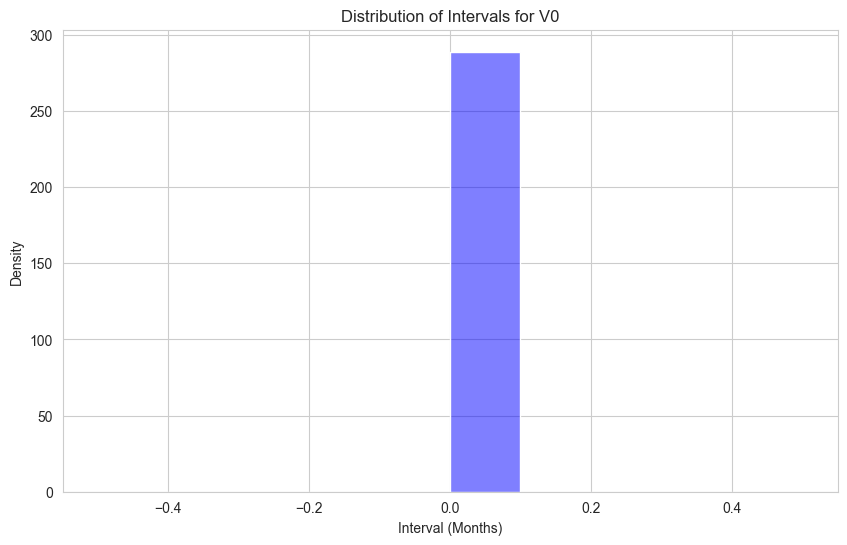

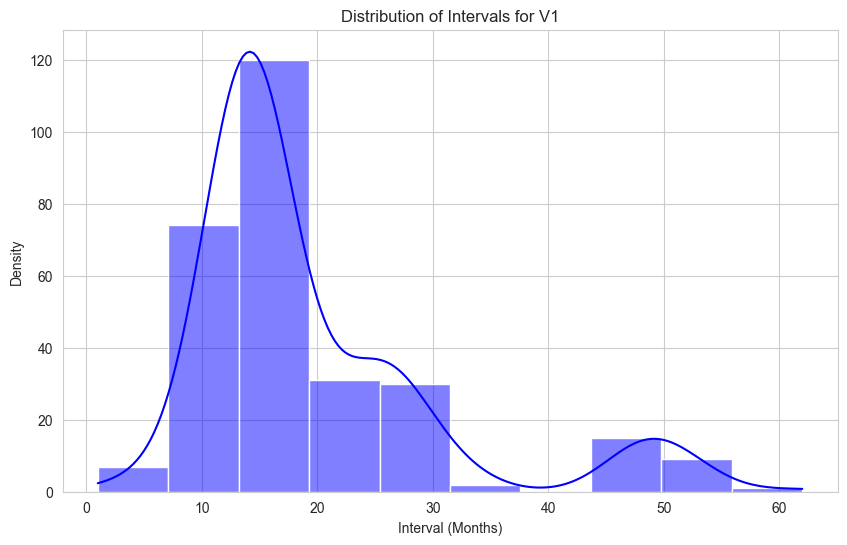

In [19]:
input_csv = 'B:/Sami Sir Research/Data set/Final Dataset v2/two_v.csv'
plot_visit_distribution(input_csv)

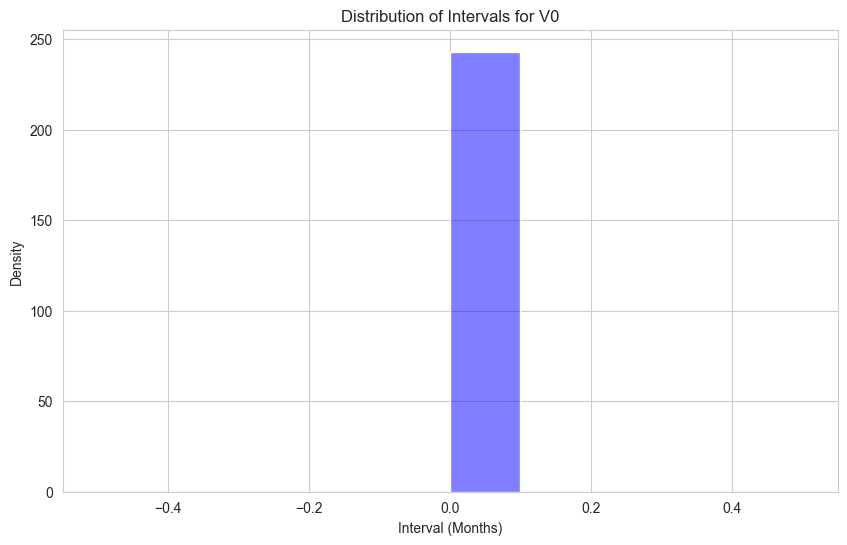

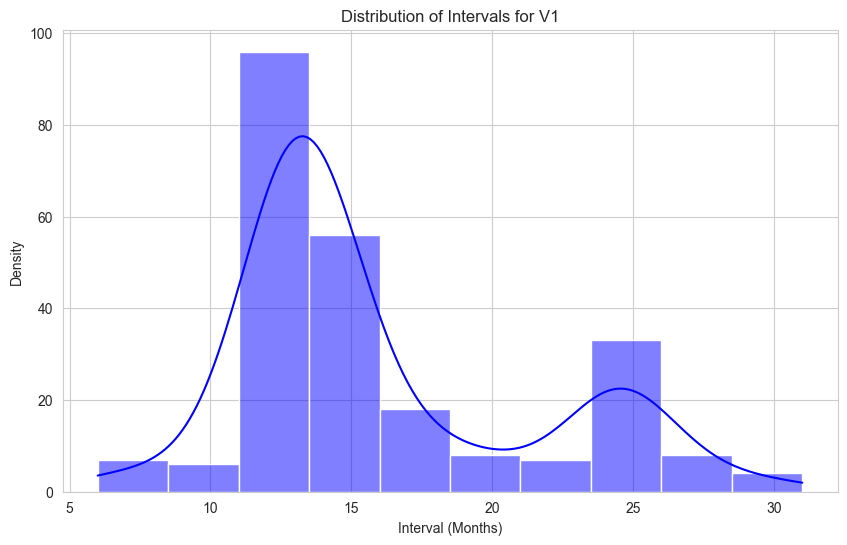

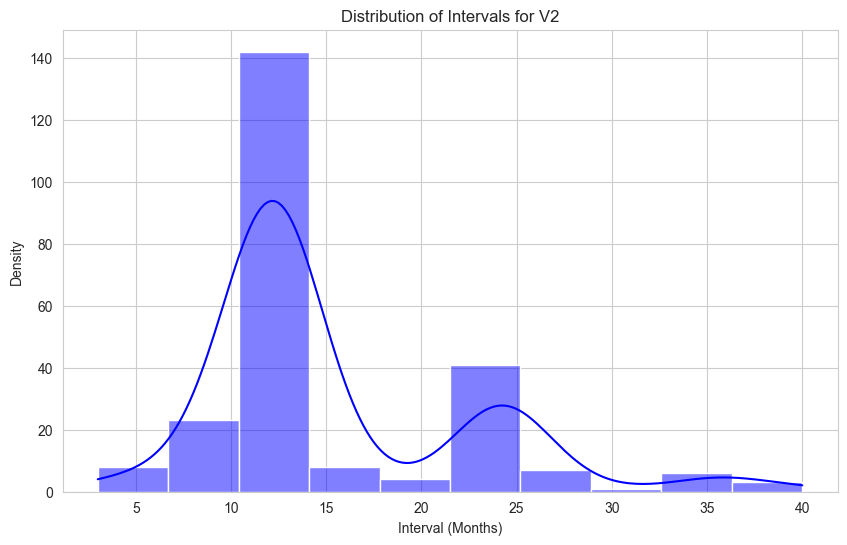

In [20]:
input_csv = 'B:/Sami Sir Research/Data set/Final Dataset v2/three_v.csv'
plot_visit_distribution(input_csv)

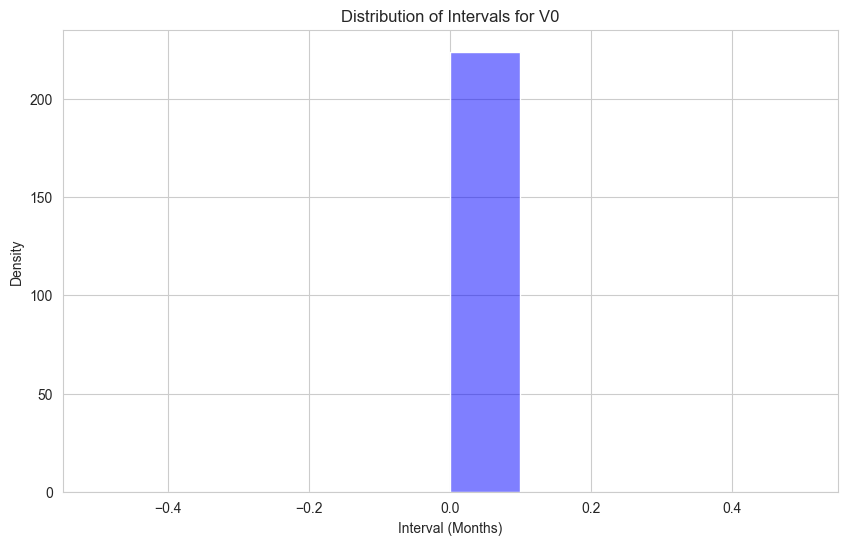

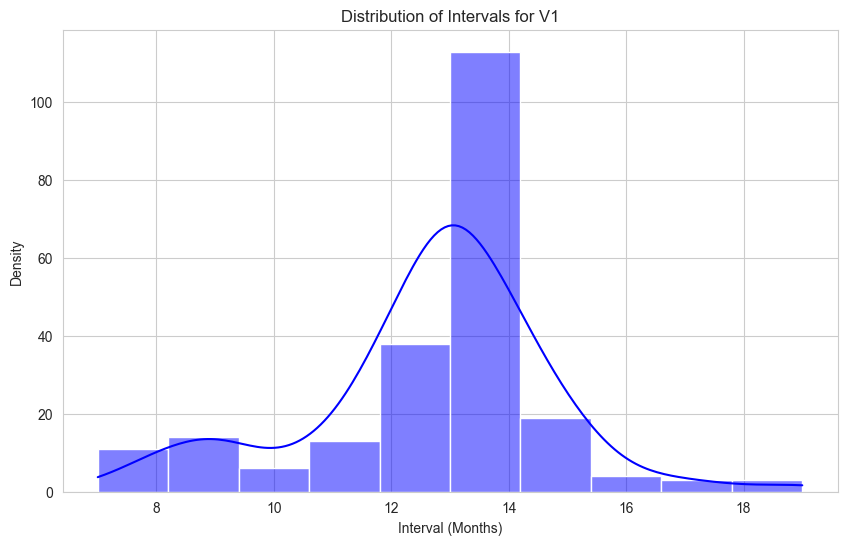

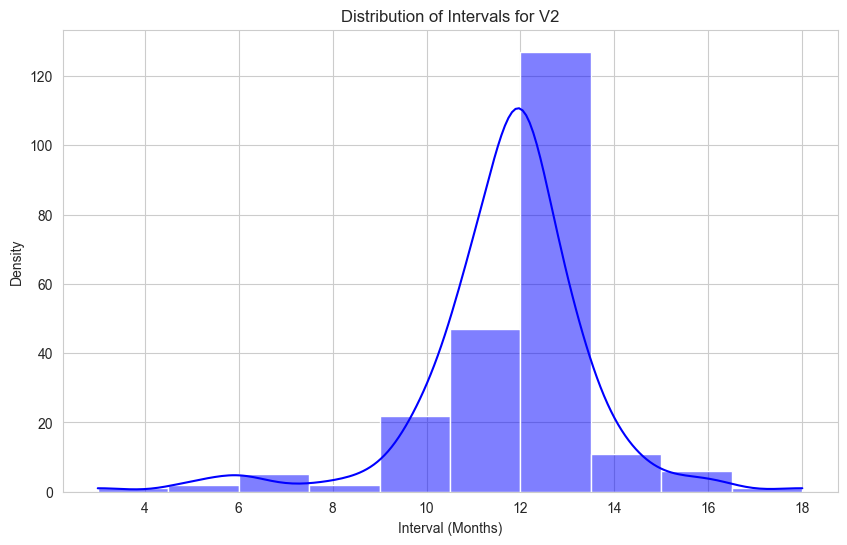

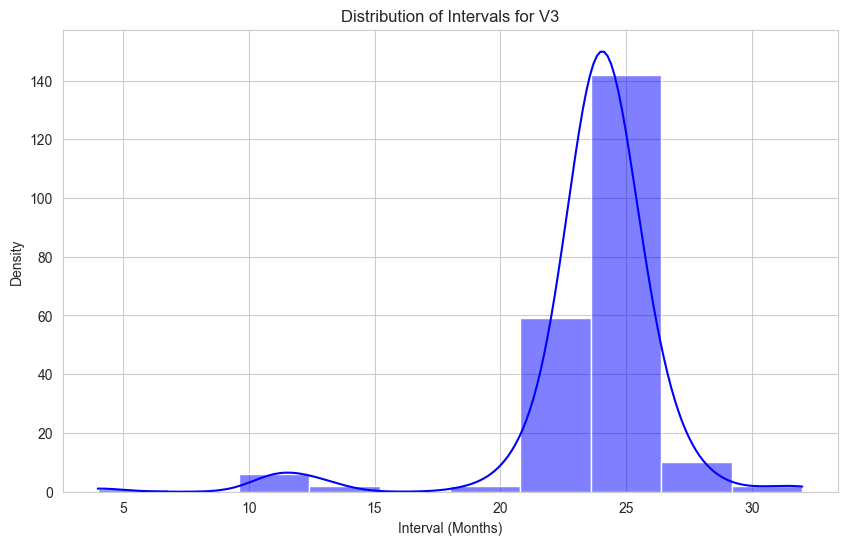

In [21]:
input_csv = 'B:/Sami Sir Research/Data set/Final Dataset v2/four_v.csv'
plot_visit_distribution(input_csv)

In [22]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

def generate_visit_distribution_pdfs(input_csv, output_pdf):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(input_csv)

    # Create a PDF file to save the plots
    with PdfPages(output_pdf) as pdf:
        # Group data by 'Visit' and plot distributions
        for visit_label, group in df.groupby('Visit'):
            plt.figure(figsize=(10, 6))
            sns.histplot(group['Interval (Months)'], kde=True, bins=10, color='blue')
            plt.title(f'Distribution of Intervals for {visit_label}')
            plt.xlabel('Interval (Months)')
            plt.ylabel('Density')
            plt.grid(True)

            # Save the current plot into the PDF
            pdf.savefig()
            plt.close()

# Example usage



In [23]:
input_csv = 'B:/Sami Sir Research/Data set/Final Dataset v2/four_v.csv'
output_pdf = 'B:/Sami Sir Research/Data set/Final Dataset v2/four_v.pdf'
generate_visit_distribution_pdfs(input_csv, output_pdf)

In [24]:
input_csv = 'B:/Sami Sir Research/Data set/Final Dataset v2/three_v.csv'
output_pdf = 'B:/Sami Sir Research/Data set/Final Dataset v2/three_v.pdf'
generate_visit_distribution_pdfs(input_csv, output_pdf)

# Print pixel values of a gray scal image

In [ ]:
import numpy as np
from skimage import io

# Define the function to print pixel values
def print_pixel_values(image_path):
    # Read the image
    image = io.imread(image_path, as_gray=True)
    image[image != 0] = 255
    
    # Set numpy print options to ensure all values are printed
    np.set_printoptions(threshold=np.inf)
    
    # Print the pixel values
    print(image)

# Path to the specific image
image_path = r"B:\Sami Sir Research\Data set\Final Dataset v2\output\3442_2016-04-27_13_05_14.0_slice44.png"

# Print pixel values of the specified image
print("Pixel values for the specified image:")
print_pixel_values(image_path)